# How does the average petrol station price of all types of fuel influence the sale of inner-combustion cars? Reviewed per month between January 2006 and January 2022.

Members: Mijntje Holl, Demi Reuvekamp, Hessel Rozema, Lucas Verhofstad & Job van Witsen
Student numbers: 4869346, 5050782, 4956192, 5846706, 5885558

# Main Research Question:

Is there a relation between the amount of vehicles sold in the Netherlands and the average petrol station price of all types of fuels? Reviewed per month between January 2006 and January 2022.

# Sub Questions:

How do car sales in the Netherlands evolve over the years?

How do petrol station prices of fuel evolve over the years?

How has consumer confidence influenced car sales over the years?

How has the economic climate influenced petrol station fuel prices over the years?

How has the willingness to buy influenced the car sales and fuel prices over the years?

# Conclusion:

Throughout the years car sales have decreased, while fuel prices have increased. When the fuel prices increases consumers tend to feel less confident, thus consumer confidens decreases. The same goes for the economic climate of people, the lower the prices of items such as petrol and cars the higher people rank their own financial situation.

It can be concluded that the willingness to buy in a negative case typically leads to a lower amount of car sales. As the public will have a lower general demand. A large willingness to buy is shown to also provide larger amounts of cars sold, however it can be so that the public has a increase in demand for another product. 

There are several points where the willingness to buy decreases just before the fuel price drops. Simultaneously it can be seen that there are peaks in willingness to buy followed by peaks in fuel price. However, willingness to buy is never the only factor influencing the prices. 

All of the subquestions have been answered to get more insight into the relation between the amount of inner-combustion car sales and the average fuel price at petrol stations. All of the results show that there are considarable relationships between consumer confidence, economic climate and willingness to buy in combination with the fuel prices and car sales. Therefore, it can be expected that there is a plausible (indirect) relation between fuel prices and car sales. The higher the fuel prices, the lower the car sales. This realtion is an indirect relationship as it contains pairwise interactions between the sectors of fuel prices and car sales through other sectors, being consumer confidence, economic climate and willingness to buy.

**Firstly all data is imported and made to fit a cohesive layout:**

In [1]:
#Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import plotly.graph_objects as go
import seaborn as sns

#Import data
df_sheet1 = pd.read_excel("Willingness_to_buy.xlsx")
df_sheet = df_sheet1.T
df_sheet2 = pd.read_excel("Pump_prices.xlsx", skiprows=5)
df_sheet3 = pd.read_excel("TIL6010 python.xlsx", sheet_name='Verkoopcijfers autos in nederla')

In [2]:
#Function to extract valid date
def extract_valid_date(date_str):
    match = re.search(r'\d{4}\s\w+', date_str)
    if match:
        return match.group()
    return None

In [3]:
#Cleaning Pump prices data
df_sheet2.rename(columns={"Motor fuel": "Periods"}, inplace=True)
df_sheet2 = df_sheet2[1:]
selected_columns_1 = ["Periods", "Euro 95", "Transport diesel", "LPG"]
df_sheet2 = df_sheet2[selected_columns_1]
df_sheet2['Periods'] = df_sheet2['Periods'].apply(extract_valid_date)
df_sheet2 = df_sheet2.dropna(subset=['Periods'])
df_sheet2['Periods'] = pd.to_datetime(df_sheet2['Periods'], format='%Y %B')
df_sheet2.reset_index(drop=True, inplace=True)

#Print result
df_sheet2.head()

Periods Euro 95 Transport diesel    LPG
0 2006-01-01   1.357            1.018  0.558
1 2006-02-01   1.330            1.020  0.553
2 2006-03-01   1.356            1.045  0.522
3 2006-04-01   1.431            1.078  0.522
4 2006-05-01   1.433            1.073  0.500

In [4]:
#Rename columns
df_sheet.columns = df_sheet.iloc[0]
df_sheet = df_sheet[2:]
df_sheet.rename(columns={"Topic": "Periods"}, inplace=True)

#Cleaning Willingness to buy data
selected_columns = ["Periods", "Consumer confidence", "Economic climate", "Willingness to buy"]
df_sheet = df_sheet[selected_columns]

#Format date
df_sheet['Periods'] = df_sheet['Periods'].apply(extract_valid_date)
df_sheet = df_sheet.dropna(subset=['Periods'])
df_sheet['Periods'] = pd.to_datetime(df_sheet['Periods'], format='%Y %B')
df_sheet.reset_index(drop=True, inplace=True)

#Print result
df_sheet.tail()

Column1    Periods Consumer confidence Economic climate Willingness to buy
445     2023-05-01                 -38              -53                -28
446     2023-06-01                 -39              -54                -29
447     2023-07-01                 -39              -54                -29
448     2023-08-01                 -40              -56                -29
449     2023-09-01                 -39              -57                -28

In [5]:
#Convert name to number of month
month_name_to_number = {
    'januari': 1,
    'februari': 2,
    'maart': 3,
    'april': 4,
    'mei': 5,
    'juni': 6,
    'juli': 7,
    'augustus': 8,
    'september': 9,
    'oktober': 10,
    'november': 11,
    'december': 12
}
df_sheet3['Periods'] = pd.to_datetime(df_sheet3['Jaar'].astype(str) + df_sheet3['Maand'].map(month_name_to_number).astype(str), format='%Y%m')
selected_columns3 = ["Periods", "Verkoop"]
df_sheet3 = df_sheet3[selected_columns3]

#Print result
df_sheet3.head()

Periods  Verkoop
0 2023-01-01    32845
1 2023-02-01    28128
2 2023-03-01    37452
3 2023-04-01    29669
4 2023-05-01    33135

In [6]:
#Merge sheets
result = pd.merge(df_sheet, df_sheet2, on="Periods", how="outer")
result = pd.merge(result, df_sheet3, on="Periods", how="outer")
result.head()

Periods Consumer confidence Economic climate Willingness to buy Euro 95  \
0 1986-04-01                   2                6                  0     NaN   
1 1986-05-01                   8               17                  1     NaN   
2 1986-06-01                  15               33                  3     NaN   
3 1986-07-01                  20               45                  4     NaN   
4 1986-08-01                  21               47                  4     NaN   

  Transport diesel  LPG  Verkoop  
0              NaN  NaN      NaN  
1              NaN  NaN      NaN  
2              NaN  NaN      NaN  
3              NaN  NaN      NaN  
4              NaN  NaN      NaN

In [7]:
#Create a mask
mask = (result['Periods'] >= '2006-01-01') & (result['Periods'] <= '2022-12-31')

# Apply the mask to filter the DataFrame
result = result[mask]

# Reset the index to make it continuous
result.reset_index(drop=True, inplace=True)
result.tail()

Periods Consumer confidence Economic climate Willingness to buy  \
199 2022-08-01                 -54              -74                -40   
200 2022-09-01                 -59              -79                -46   
201 2022-10-01                 -59              -75                -48   
202 2022-11-01                 -56              -72                -46   
203 2022-12-01                 -52              -65                -43   

    Euro 95 Transport diesel    LPG  Verkoop  
199   2.065            1.974  0.849  23638.0  
200   1.967            1.999  0.841  25792.0  
201   1.995            2.076  0.834  28992.0  
202   1.912            1.925  0.824  27810.0  
203   1.759            1.751  0.796  30900.0

In [8]:
#Convert values to numeric
result['Consumer confidence'] = pd.to_numeric(result['Consumer confidence'], errors='coerce')
result['Economic climate'] = pd.to_numeric(result['Economic climate'], errors='coerce')
result['Willingness to buy'] = pd.to_numeric(result['Willingness to buy'], errors='coerce')
result['Euro 95'] = pd.to_numeric(result['Euro 95'], errors='coerce')
result['Transport diesel'] = pd.to_numeric(result['Transport diesel'], errors='coerce')
result['LPG'] = pd.to_numeric(result['LPG'], errors='coerce')

**All sub questions are coded below:**

# How do car sales in the Netherlands evolve over the years?

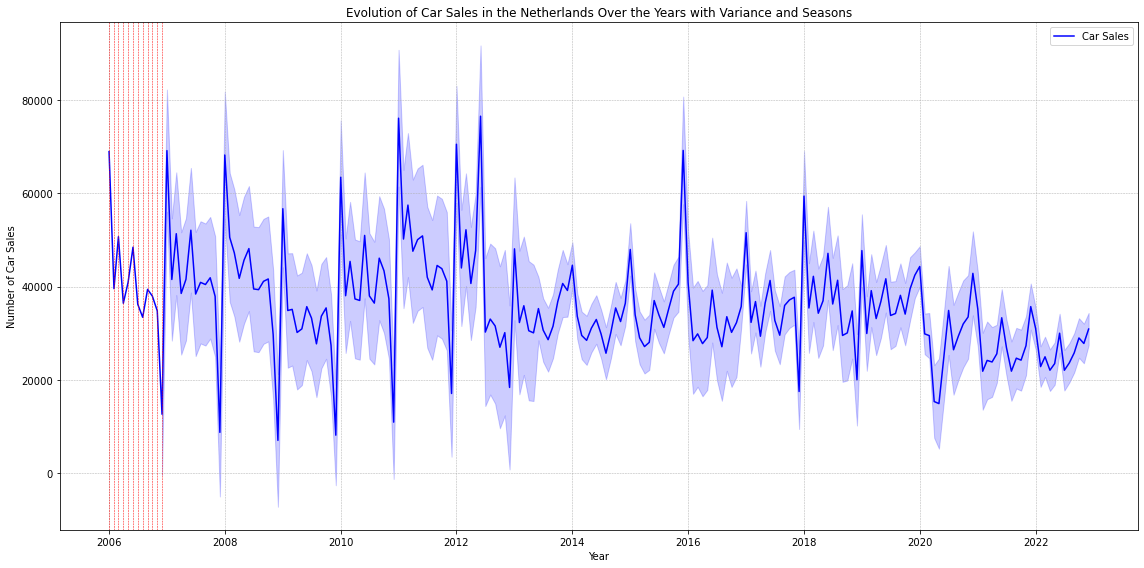

In [9]:
car_sales_data = result

# Calculate the rolling standard deviation for variance
window_size = 12  # You can adjust the window size as needed
rolling_std = car_sales_data['Verkoop'].rolling(window=window_size).std()

# Plotting the graph with min-max line, trend (average), and variance
plt.figure(figsize=(16, 8))

# Main trend line (average)
plt.plot(car_sales_data['Periods'], car_sales_data['Verkoop'], label='Car Sales', color='blue', linestyle='-')

# Variance shading
plt.fill_between(car_sales_data['Periods'], car_sales_data['Verkoop'] - rolling_std, car_sales_data['Verkoop'] + rolling_std, color='blue', alpha=0.2)

# Annotations for seasons (assuming monthly data)
seasons = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i, month in enumerate(seasons):
    plt.axvline(x=car_sales_data['Periods'][i], color='red', linestyle='--', linewidth=0.5)
    #plt.text(car_sales_data['Periods'][i], car_sales_data['Verkoop'].min(), month, rotation=90, verticalalignment='bottom', color='red')

plt.title('Evolution of Car Sales in the Netherlands Over the Years with Variance and Seasons')
plt.xlabel('Year')
plt.ylabel('Number of Car Sales')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Explanation on the evolution of Car Sales in the Netherlands:**

To answer the main research question, we need to gain a deeper understanding of the car sales industry. Therefore, we've crafted an informative graph that traces the monthly car sales spanning the years 2006 to 2023. 

An interesting trend emerges when the graph is examined in further detail. Despite the significant differences in peak values between the years 2006 to 2013 and the more recent years, the average car sales over this period have remained relatively consistent. The min-max line for the earlier years shows dramatic maximum and minimum values, which indicates substantial fluctuations. The solid trendline represents the car sales and this trendline remains quite steady during the last years, indicating that, on average, monthly car sales have shown some sort of stability.

This consistency in average car sales suggests that the car sales market, during the recent years, has reached a point of equilibrium where the variations between high and low sales months have quite balanced out over time. This form of stability can be seen as a reflection of a more mature and less turbulent market, which is of great interest to industry analysts and stakeholders.

# How do petrol station prices of fuel evolve over the years?

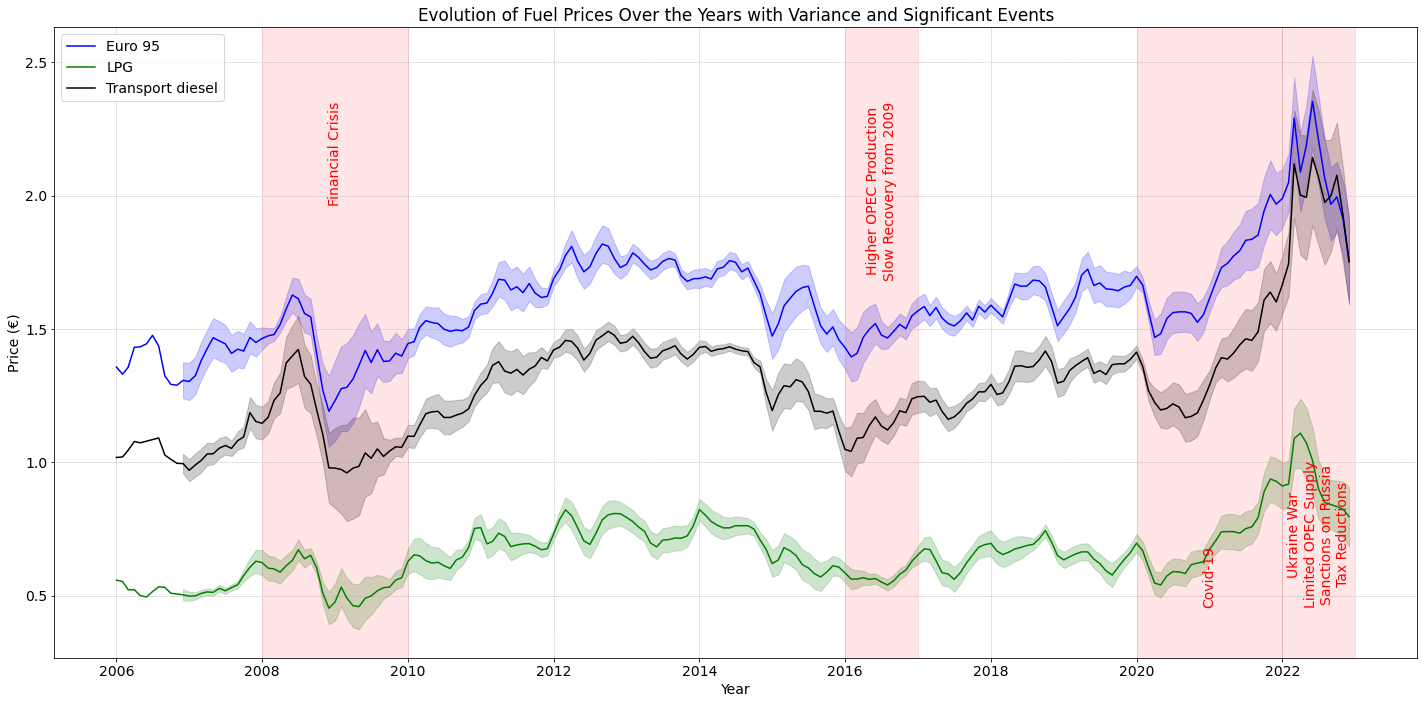

In [10]:
#Setting the font size for figure to 14
plt.rcParams.update({'font.size': 14})

fuel_types = ['Euro 95', 'LPG', 'Transport diesel']

# Calculate the rolling standard deviation for each fuel type
rolling_stds = {}
for fuel in fuel_types:
    rolling_stds[fuel] = result[fuel].rolling(window=12).std()

# Plotting the graph with variance (confidence interval) for each fuel type
plt.figure(figsize=(20, 10))

colors = {'Euro 95': 'blue', 'LPG': 'green', 'Transport diesel': 'black'}
for fuel, color in colors.items():
    plt.plot(result['Periods'], result[fuel], label=fuel, color=color, linestyle='-')
    plt.fill_between(result['Periods'], result[fuel] - rolling_stds[fuel], result[fuel] + rolling_stds[fuel], color=color, alpha=0.2)

# Annotations and events with durations
events_durations = {
    ('2008-01-01', '2009-12-31'): ('Financial Crisis', 'top'),
    ('2016-01-01', '2016-12-31'): ('Higher OPEC Production\nSlow Recovery from 2009', 'top'),
    ('2020-01-01', '2022-01-01'): ('Covid-19', 'bottom'),
    ('2022-01-01', '2022-12-31'): ('Ukraine War\nLimited OPEC Supply\nSanctions on Russia\nTax Reductions', 'bottom')
}

for (start_date, end_date), (event, valign) in events_durations.items():
    plt.axvspan(pd.Timestamp(start_date), pd.Timestamp(end_date), color='red', alpha=0.1)
    
    # Calculate the horizontal midpoint of the event duration
    midpoint = pd.Timestamp(start_date) + (pd.Timestamp(end_date) - pd.Timestamp(start_date)) / 2
    
    # Use the specified vertical alignment from the dictionary
    y_pos = max([result[fuel].max() for fuel in fuel_types]) if valign == 'top' else min([result[fuel].min() for fuel in fuel_types])
    plt.text(midpoint, y_pos, event, rotation=90, verticalalignment=valign, color='red', ha='center')

#plot
plt.title('Evolution of Fuel Prices Over the Years with Variance and Significant Events')
plt.xlabel('Year')
plt.ylabel('Price (€)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


**Explanation on the evolution of Fuel Prices in the Netherlands:**

The fuel prices have been plotted for three different types of fuel: Euro 95, LPG and Transport Diesel. This will give insight in how the fuel prices behave. The variance of the rolling average is also plotted in a shade of the color, as can be seen in the figure above. The different fuel types follow roughly the same effects. Only the variance varies per fuel type, LPG seems to have the smallest variance where Diesel has the biggest. 

The dutch fuel price is strongly dependent on the oil price. The oil-price dropped in 2009 due to the financial crisis, which is also seen in the fuel price graph (Mert, 2016). In 2016 the oil price dropped again, this time due to higher production from the OPEC countries and slow recovery from the 2009 financial crisis (Stocker, Baffes, & Vorisek, 2018). The fuel price peeks in 2022. This is caused by limited supply of OPEC and by sanctions on Russia by the European Union. In this time the government also gave tax reductions on fuel (ANP, 2023). 

Overall an increase in fuel-price can be seen. The variance of the fuel-price seems to be higher when there are crises, as seen in 2009 (financial crisis), 2020 (Covid-19) and 2022 (Ukraine war), and can have a positive or negative effect on the fuel price. Also the OPEC production seems to have a big impact on the fuel price

# What is the relation between fuel price, car sales and consumer confidence?

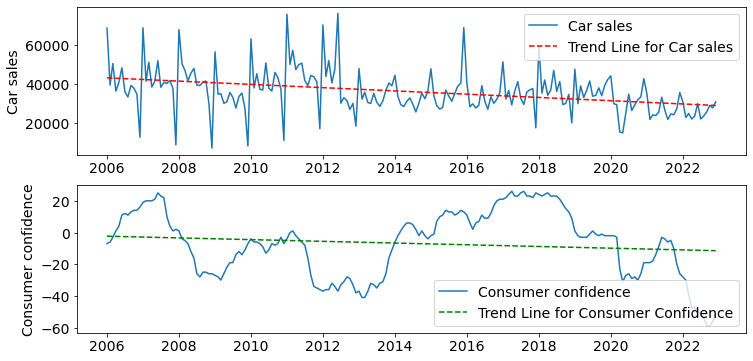

In [11]:
# Extracting data
x = result['Periods']
y1 = result['Consumer confidence']
y2 = result['Verkoop']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Calculating trend lines
trend_line_y2 = np.polyfit(range(len(x)), y2, 1)
trend_line_y1 = np.polyfit(range(len(x)), y1, 1)

trend_line_y2_data = np.polyval(trend_line_y2, range(len(x)))
trend_line_y1_data = np.polyval(trend_line_y1, range(len(x)))

# Plotting data and trend lines
axes[0].plot(x, y2, label='Car sales')
axes[0].plot(x, trend_line_y2_data, label='Trend Line for Car sales', linestyle='--', color='red')
axes[1].plot(x, y1, label='Consumer confidence')
axes[1].plot(x, trend_line_y1_data, label='Trend Line for Consumer Confidence', linestyle='--', color='green')

# Setting axis labels and legends
axes[0].set_ylabel('Car sales')
axes[1].set_ylabel('Consumer confidence')
axes[0].legend()
axes[1].legend()

# Displaying the plot
plt.show()

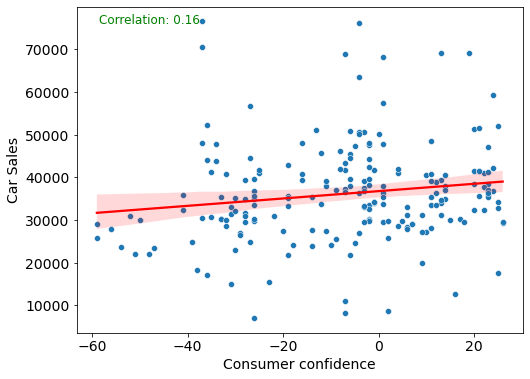

In [12]:
# Plotting a scatter plot with linear regression line
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(x='Consumer confidence', y='Verkoop', data=result)
sns.regplot(x='Consumer confidence', y='Verkoop', data=result, scatter=False, color='red', label='Linear Regression Line')

# Calculating and displaying the correlation
correlation = result['Consumer confidence'].corr(result['Verkoop'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, color='green')

# Setting axis label and displaying the plot
plt.ylabel('Car Sales')
plt.show()

**Explanation on the correlation between Car Sales and Consumer Confidence:**

Consumer confidence measures how optimistic (or pessimistic) consumers are about the state of the economy. In other words, consumer confidence gives an indication how people are feeling about the economy. This is generally expressed in how they save and how they spend their money. The more they spend, the more people are confident about the direction and state of the economy (Ganti, 2023). If people save more, it generally means they aren't feeling as optimistic.

Looking at the graphs for consumer confidence and car sales it can be observed that there is a small correlation between the two. When consumer confidence reduces, car sales tend to decrease as well.

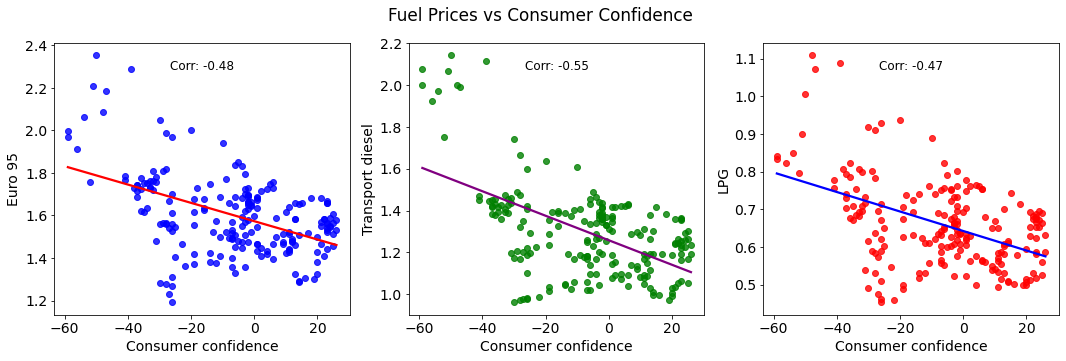

In [13]:
# Extracting relevant data
data = result[['Consumer confidence', 'Euro 95', 'Transport diesel', 'LPG']]

# Setting colors for scatter plots and regression lines
scatter_colors = ['blue', 'green', 'red']
line_colors = ['red', 'purple', 'blue']

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plotting scatter plots with regression lines for different fuel types
for i, fuel in enumerate(['Euro 95', 'Transport diesel', 'LPG']):
    scatterplot = sns.regplot(data=data, x='Consumer confidence', y=fuel, ci=None, color=scatter_colors[i], ax=axes[i])
    
    # Setting color for regression line
    scatterplot.get_lines()[0].set_color(line_colors[i])
    
    # Calculating and annotating correlation
    correlation = data[['Consumer confidence', fuel]].corr().iloc[0, 1]
    axes[i].annotate(f'Corr: {correlation:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white', ha='center')
    
    # Setting axis labels
    axes[i].set_xlabel('Consumer confidence')
    axes[i].set_ylabel(fuel)

# Adding a title
plt.suptitle('Fuel Prices vs Consumer Confidence')

# Displaying the plot
plt.show()

**Explanation on the correlation between Fuel Prices and Consumer Confidence:**

When a scatterplot is made between fuel prices and consumer confidence it can be noticed that these are negatively correlated. When fuel prices are low, consumer confidence will increase.

# How has the economic climate influenced petrol station fuel prices over the years?

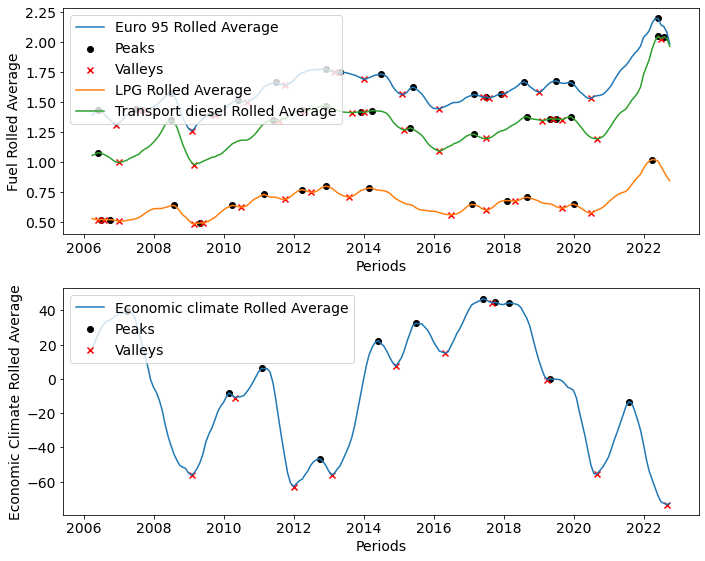

In [14]:
question_4 = result[['Economic climate', 'Euro 95', 'Transport diesel', 'LPG', 'Periods']].copy()

# Columns to analyze
columns_to_analyze_fuels = ['Euro 95', 'LPG', 'Transport diesel']
columns_to_analyze_economic = ['Economic climate']

# Window size for rolled average
window_size = 6 

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Iterate over fuel columns
for i, column in enumerate(columns_to_analyze_fuels):
    # Calculate rolled average
    question_4.loc[:, f'{column}_rolled_avg'] = question_4[column].rolling(window=window_size, center=True).mean()

    # Identify peaks and valleys
    question_4.loc[:, f'{column}_peak'] = (question_4[f'{column}_rolled_avg'] > question_4[f'{column}_rolled_avg'].shift(1)) & (question_4[f'{column}_rolled_avg'] > question_4[f'{column}_rolled_avg'].shift(-1))
    question_4.loc[:, f'{column}_valley'] = (question_4[f'{column}_rolled_avg'] < question_4[f'{column}_rolled_avg'].shift(1)) & (question_4[f'{column}_rolled_avg'] < question_4[f'{column}_rolled_avg'].shift(-1))
    
    # Plot the rolled average
    axs[0].plot(question_4['Periods'], question_4[f'{column}_rolled_avg'], label=f'{column} Rolled Average')

    # Mark peaks with black circles
    peaks = question_4[question_4[f'{column}_peak']]
    if i == 0:
        axs[0].scatter(peaks['Periods'], peaks[f'{column}_rolled_avg'], color='black', marker='o', label='Peaks')
    else:
        axs[0].scatter(peaks['Periods'], peaks[f'{column}_rolled_avg'], color='black', marker='o')

    # Mark valleys with red crosses
    valleys = question_4[question_4[f'{column}_valley']]
    if i == 0:
        axs[0].scatter(valleys['Periods'], valleys[f'{column}_rolled_avg'], color='red', marker='x', label='Valleys')
    else:
        axs[0].scatter(valleys['Periods'], valleys[f'{column}_rolled_avg'], color='red', marker='x')

# Set plot labels and legend
axs[0].set_xlabel('Periods')
axs[0].set_ylabel('Fuel Rolled Average')
lines, labels = axs[0].get_legend_handles_labels()
legend_order = [0, 3, 4, 1, 2]
if all(index < len(lines) for index in legend_order):
    axs[0].legend([lines[j] for j in legend_order], [labels[j] for j in legend_order])

# Iterate over economic climate column
for i, column in enumerate(columns_to_analyze_economic):
    # Calculate rolled average
    question_4.loc[:, f'{column}_rolled_avg'] = question_4[column].rolling(window=window_size, center=True).mean()

    # Identify peaks and valleys
    question_4.loc[:, f'{column}_peak'] = (question_4[f'{column}_rolled_avg'] > question_4[f'{column}_rolled_avg'].shift(1)) & (question_4[f'{column}_rolled_avg'] > question_4[f'{column}_rolled_avg'].shift(-1))
    question_4.loc[:, f'{column}_valley'] = (question_4[f'{column}_rolled_avg'] < question_4[f'{column}_rolled_avg'].shift(1)) & (question_4[f'{column}_rolled_avg'] < question_4[f'{column}_rolled_avg'].shift(-1))
    
    # Plot the rolled average
    axs[1].plot(question_4['Periods'], question_4[f'{column}_rolled_avg'], label=f'{column} Rolled Average')

    # Mark peaks with black circles
    peaks = question_4[question_4[f'{column}_peak']]
    if i == 0:
        axs[1].scatter(peaks['Periods'], peaks[f'{column}_rolled_avg'], color='black', marker='o', label='Peaks')
    else:
        axs[1].scatter(peaks['Periods'], peaks[f'{column}_rolled_avg'], color='black', marker='o')

    # Mark valleys with red crosses
    valleys = question_4[question_4[f'{column}_valley']]
    if i == 0:
        axs[1].scatter(valleys['Periods'], valleys[f'{column}_rolled_avg'], color='red', marker='x', label='Valleys')
    else:
        axs[1].scatter(valleys['Periods'], valleys[f'{column}_rolled_avg'], color='red', marker='x')

# Set plot labels and legend
axs[1].set_xlabel('Periods')
axs[1].set_ylabel('Economic Climate Rolled Average')
axs[1].legend(loc='upper left')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Explanation on the rolled average of Euro95 and the Economic climate:**

Economic climate measures how optimistic (or pessimistic) consumers think about the state of their own economic situation. The higher the number the better they think their economic situation is. 
The top figure shows that the graph of the fuel prices shows the same trend, however not all peaks and valleys align. This is probably due to fluctuations in the different oils and gasses. 
When looking at the bottom figure it can be made clear that the trend of the economic climate does not follow the same trend as the fuel prices. However, the peaks and valleys do show some similarities with the fuels. 

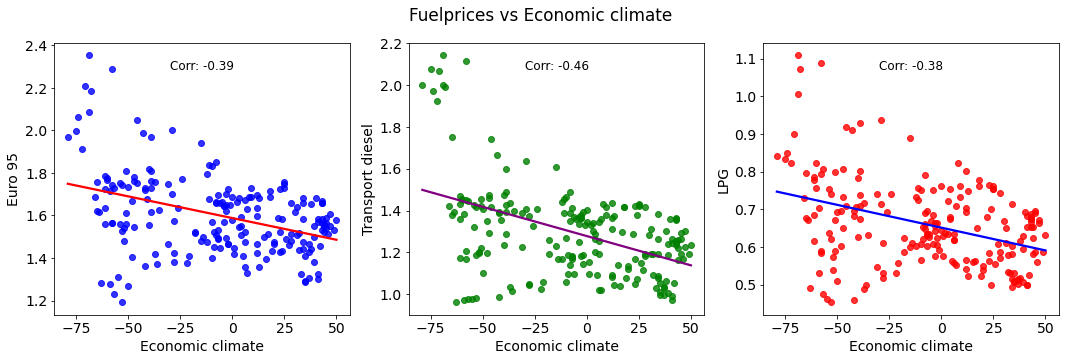

In [15]:
scatter_colors = ['blue', 'green', 'red']
line_colors = ['red', 'purple', 'blue']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, fuel in enumerate(['Euro 95', 'Transport diesel', 'LPG']):
    scatterplot = sns.regplot(data=question_4, x='Economic climate', y=fuel, ci=None, color=scatter_colors[i], ax=axes[i])
    
    scatterplot.get_lines()[0].set_color(line_colors[i])
    
    correlation = question_4[['Economic climate', fuel]].corr().iloc[0, 1]
    
    axes[i].annotate(f'Corr: {correlation:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white', ha='center')
    
    axes[i].set_xlabel('Economic climate')
    axes[i].set_ylabel(fuel)

plt.suptitle('Fuelprices vs Economic climate')

plt.show()

**Explanation on the correlation between Fuel Prices and Economic Climate:**

In the figure above, the fuel prices are put against the economic climate. From this figure can be concluded that the higher the view of the consumers own financial situation the lower the fuel prices. 

With the info from both these graphs, it can be concluded that people tend to find their economic situation better when the fuel prices are lower.

# How has the willingness to buy influenced the car sales and fuel prices over the years?

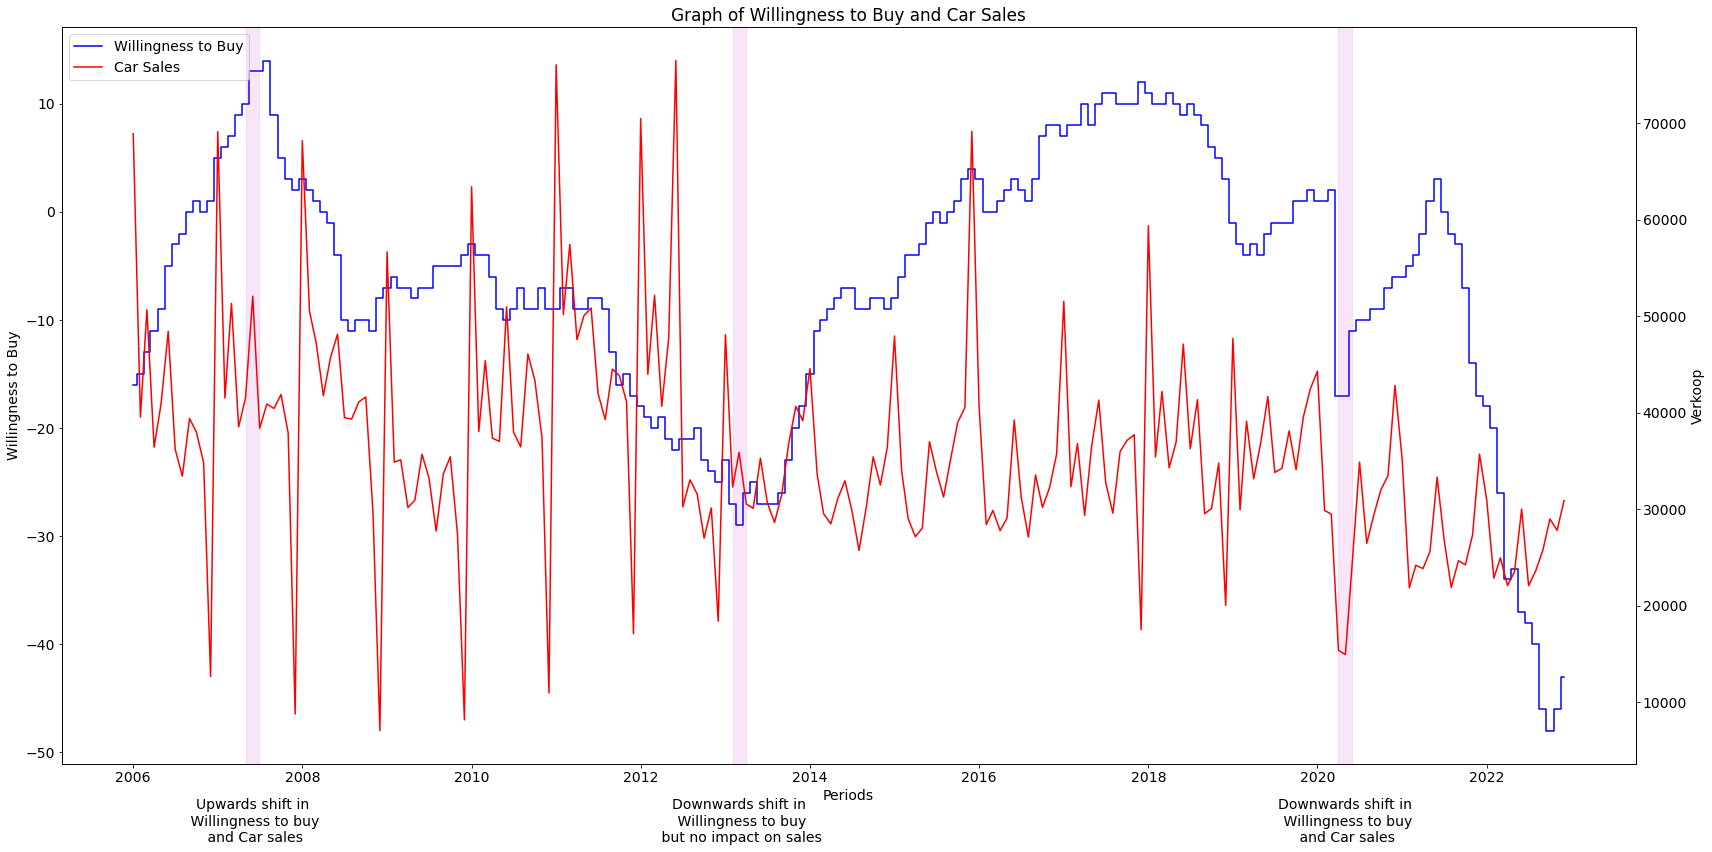

In [16]:
#Setting the font size for figure to 14
plt.rcParams.update({'font.size': 14})

# Create a temporary DataFrame for plotting without modifying the original result DataFrame
plot_data = result[['Periods', 'Willingness to buy', 'Verkoop']].copy()

# Create a figure 
fig, ax1 = plt.subplots(figsize=(24, 12))

# Sort the temporary DataFrame by Periods
sorted_data = plot_data.sort_values(by='Periods')

# Create a staircase graph for 'Willingness to Buy' on the left Y-axis
ax1.step(sorted_data['Periods'], sorted_data['Willingness to buy'], label='Willingness to Buy', where='mid', color='b')
ax1.set_xlabel('Periods')
ax1.set_ylabel('Willingness to Buy', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_title('Graph of Willingness to Buy and Car Sales')

# Create a second set of axes on the right side
ax2 = ax1.twinx()

# Create a regular line plot for 'Verkoop' on the right Y-axis
ax2.plot(sorted_data['Periods'], sorted_data['Verkoop'], label='Car Sales', color='r')
ax2.set_ylabel('Verkoop', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add a legend that includes both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Add important moments
events_durations = {
    ('2020-04-01', '2020-05-31'): ('Downwards shift in\n Willingness to buy\n and Car sales', 'top'),
    ('2013-02-01', '2013-03-31'): ('Downwards shift in\n Willingness to buy\n but no impact on sales', 'top'),
    ('2007-05-01', '2007-06-30'): ('Upwards shift in\n Willingness to buy\n and Car sales', 'top'),
}
    
for (start_date, end_date), (event, valign) in events_durations.items():
    plt.axvspan(pd.Timestamp(start_date), pd.Timestamp(end_date), color='m', alpha=0.1)

    # Calculate the position for the text label
    midpoint = pd.Timestamp(start_date) + (pd.Timestamp(end_date) - pd.Timestamp(start_date)) / 2
    
    # Add the text label
    plt.text(midpoint, 30, event, va=valign, ha='center', color='black')
    
# Plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Explanation of the willingness to buy compared with Car Sales:**

The willingness to buy a good or service and the ability to pay for it is called demand. In economics, demand refers to the buyer's desire to avail of a service or to purchase goods at a particular price without any hesitations. Accordingly, there are essential elements of demand.

The first purple highlighted section of the graph shows that the willingness to buy increases resulting in a increase in car sales as well. Logically a increase in demand will result in a increase in purcheses. 
The final and thirtd puple highlighted section of the graph show a decrease in willingness to buy. This equals a decrease in demand and thus a decrease in the amount of cars sold. 
It has to be said that the willingness to buy numbers in this graph are conducted as a "general" willingness to buy. The second highlighted second shows a increase in willingness to buy, however a decrease in car sales. As the numbers are general, the public might have decided to spend their money elsewhere then the car dealer. 

It can be concluded that the willingness to buy in a negative case typically leads to a lower amount of car sales. As the public will have a lower general demand. A large willingness to buy is shown to also provide larger amounts of cars sold, however it can be so that the public has a increase in demand for another product. 

In [17]:
# Select the columns of interest
selected_columns = ['Periods', 'Willingness to buy', 'Euro 95', 'Transport diesel', 'LPG']
result = result[selected_columns]

# Sort the DataFrame by Periods
result = result.sort_values(by='Periods')

# Create a figure using Plotly
fig = go.Figure()

# Add the first Y-axis for 'Willingness to Buy'
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Willingness to buy'], mode='lines', name='Willingness to Buy', yaxis='y1'))

# Add the second Y-axis for 'Euro 95', 'Transport diesel', and 'LPG'
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Euro 95'], mode='lines', name='Euro 95 Fuel', yaxis='y2'))
fig.add_trace(go.Scatter(x=result['Periods'], y=result['Transport diesel'], mode='lines', name='Transport Diesel', yaxis='y2'))
fig.add_trace(go.Scatter(x=result['Periods'], y=result['LPG'], mode='lines', name='LPG', yaxis='y2'))

# Set the layout with multiple Y-axes
fig.update_layout(
    xaxis=dict(title='Periods'),
    yaxis=dict(title='Willingness to Buy', side='left', showgrid=False, titlefont=dict(color='blue')),
    yaxis2=dict(title='Euro/Litre', overlaying='y', side='right', showgrid=False, titlefont=dict(color='black')),
    title='Graph of Willingness to Buy and Car Sales'
)

# Show the interactive plot
fig.show()

**Explanation of the willingness to buy compared with fuel prices:**

Consumer willingness to buy can be defined in the following way: The behavioral intention of a consumer to buy a particular product (Donato & Raimondo, 2020). Where some people state that buyers have all control over prices, others state that prices are completely up to sellers. Purely economically speaking, the price of fuel is not and cannot be determined by buyers alone. The price of any good is a function of both supply and demand (Nielsen, 2021). There are basically two options to bring down the price of fuels, they are to either increase the aggregate supply or decrease the aggregate demand. Considering the willingness to buy being the intention of a consumer to buy a product, this can affect the price of fuels. As can bee seen in the graph below, there are several points where the willingness to buy decreases just before the fuel price drops. Simultaneously it can be seen that there are peaks in willingness to buy followed by peaks in fuel price. However, willingness to buy is never the only factor influencing the prices. There are completely opposite situations happening where the willingness to buy is low, while the fuel prices go up due to other important and influencing externalities.